In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#membaca dataset

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Data Preparation

df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Score'
},inplace=True)

In [4]:
X = df.drop(['CustomerID', 'Gender'], axis=1)
print(X)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


Text(5, 150000, 'Possible elbow point')

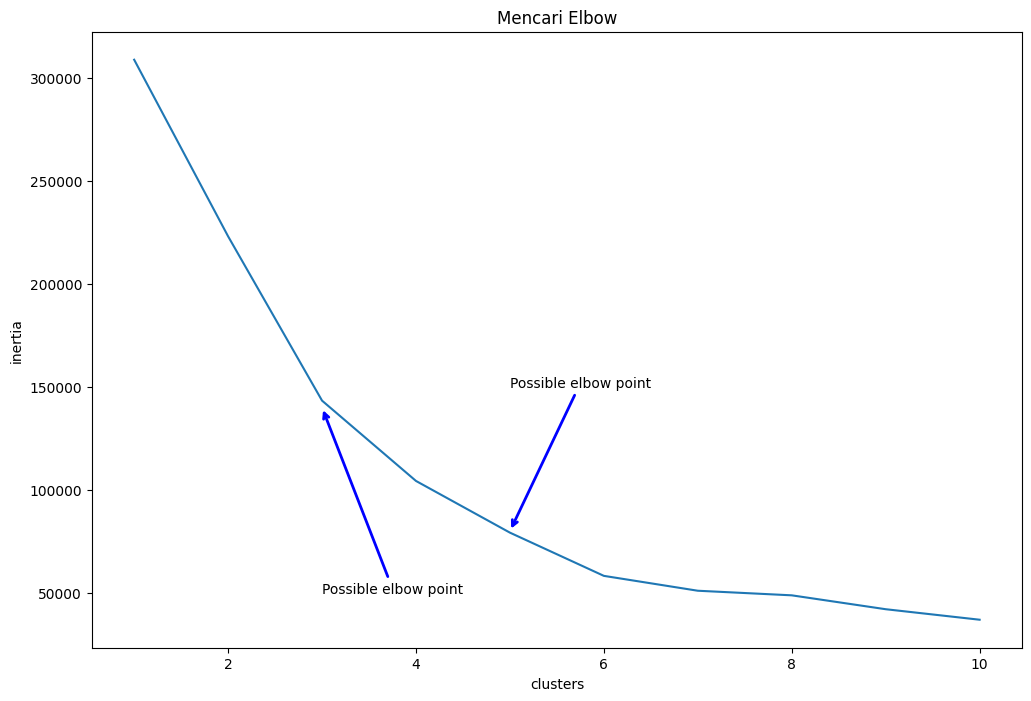

In [ ]:
#membuat elbow, untuk menentukan cluster yang optimal

clusters=[]
for i in range (1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title("Mencari Elbow")
ax.set_xlabel("clusters")
ax.set_ylabel("inertia")

#panah elbow
ax.annotate('Possible elbow point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',arrowprops=dict(arrowstyle='->',connectionstyle='arc3', color='blue', lw=2))
ax.annotate('Possible elbow point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',arrowprops=dict(arrowstyle='->',connectionstyle='arc3', color='blue', lw=2))


In [35]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

In [ ]:
plt.figure(figsize=(10, 8 ))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], markers=True, size=X['Labels'], palette=sns.color_palette('hls', n_clust))

for label in X['Labels']:
    plt.annotate(label,
                 (X[X['Labels']==label]['Income'].mean(), 
                  X[X['Labels']==label]['Score'].mean()),
                  horizontalalignment = 'center',
                  verticalalignment = 'center',
                  size = 20, weight='bold', 
                  color = 'black')



TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 4 keyword-only arguments) were given

<Figure size 1000x800 with 0 Axes>

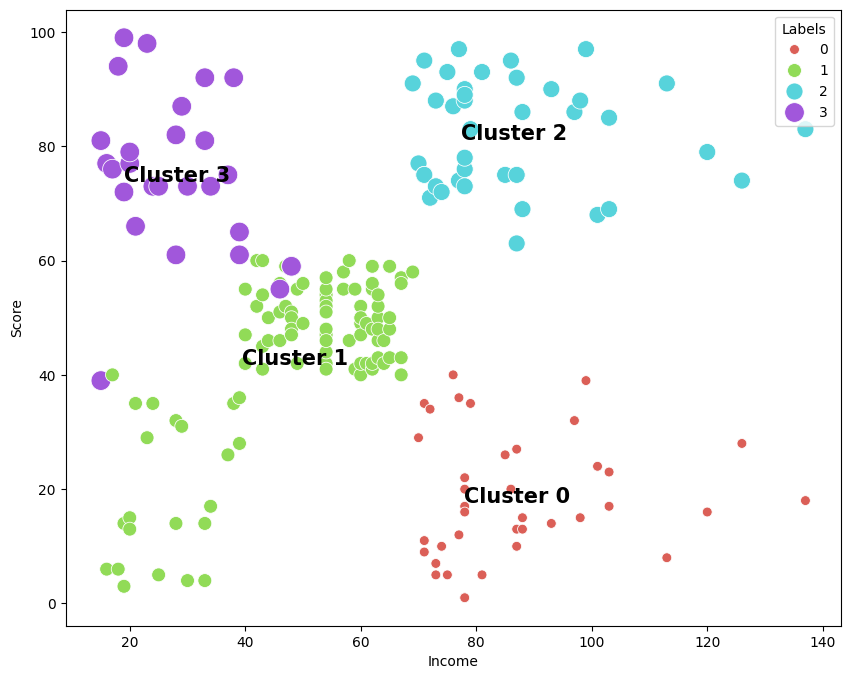

In [80]:
# Jumlah cluster untuk pewarnaan

kmeans = KMeans(n_clusters=4).fit(X)
X['Labels'] = kmeans.labels_


# Membuat scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Income', y='Score', hue='Labels',
    data=X, palette=sns.color_palette('hls', n_clust),
    size='Labels', sizes=(50, 200)
)

# Menambahkan anotasi
for label in X['Labels'].unique():
    mean_income = X[X['Labels'] == label]['Income'].mean()
    mean_score = X[X['Labels'] == label]['Score'].mean()
    plt.annotate(
        f'Cluster {label}',
        (mean_income, mean_score),
        horizontalalignment='center',
        verticalalignment='center',
        size=15, weight='bold', color='black'
    )

In [81]:
print(X)

     Age  Income  Score  Labels
0     19      15     39       3
1     21      15     81       3
2     20      16      6       1
3     23      16     77       3
4     31      17     40       1
..   ...     ...    ...     ...
195   35     120     79       2
196   45     126     28       0
197   32     126     74       2
198   32     137     18       0
199   30     137     83       2

[200 rows x 4 columns]


In [82]:
X.to_excel("Output_Cluster.xlsx")

In [76]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.
